# **Clustering for Customer Personality Analysis**

**Customer Personality Analysis Overview:**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviours and concerns of different types of customers.

For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

The most important part of a customer personality analysis is getting the answers to questions such as:

What people say about your product: what gives customers’ attitude towards the product.
What people do: which reveals what people are doing rather than what they are saying about your product.

In the section below, I’ll walk you through a data science project on analyzing customer personality with python. Here I will be using a dataset that contains data collected from a marketing campaign, where our task is to predict how different customer segments will respond for a particular product or service.

Since this is a segmentation task, we will use clustering to summarize customer segments. Let's look at the details of the dataset/features we have:

# ***Attributes***


**People**


ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise


**Products**


MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years


**Promotion**


NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


**Place**


NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month


**Target**


Need to perform clustering to summarize customer segments.

In [1]:
#Now, let’s start by importing the necessary Python libraries:

import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)

from datetime import datetime,timedelta
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [2]:
#Let's read the dataset and have a look at the first 5 rows

data = pd.read_csv("marketing_campaign.csv",sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
#Let's Checkout the types of the variables and shape of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#Let's understand the variables/features better by looking at their summary statistics [Numerical Variables Only]
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.16,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0


In [6]:
#Check how many missing values in each variable
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

1. Only Income has 24 missing records. We need to drop those rows from the datset in the data cleaning stage.

2. Dt_Customers(Date of Customer Joined) is in obj (String) format. We need to convert this to date.

# **Data Cleaning**

In [7]:
#Keeping the original version of the data and we will be working on the data1 (newly-copied data from the originally imported data)
data1 = data.copy()

In [8]:
#Let's drop the missing records and check the total number of missing values in the dataset
data1 = data1.dropna()
data1.isna().sum().sum()

0

No Missing records anymore.

Let's convert the Dt_Customer feature into Date

In [10]:
data1["Dt_Customer"] = pd.to_datetime(data1["Dt_Customer"], format='%d-%m-%Y')
data1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# **Feature Engineering**

Categorical Features:

In [11]:
data2 = data1.copy()

In [ ]:
#Let's check the frequency distribution of the "Marital_Status" Feature
data2["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
#We can reduce the number of categories by merging some of the similar individual categories

data2["Relationship_status"] = data2["Marital_Status"].replace({"Married":"Partner", "Together":"Partner",
                                                                "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Alone":"Single"})

In [13]:
#Now that we have the new recoded variable "Relationship_status", we don't want to keep the original "Marital_Status" variable in the dataset

data2.drop(["Marital_Status"],axis=1,inplace=True)

In [14]:
#Let's check the frequency distribution of the "Education" varibale

data2["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [15]:
#We will do the same with this variable as well

data2["Education_status"] = data2["Education"].replace({"Graduation":"Graduate","PhD":"Post_Graduate","Master":"Post_Graduate",
                                                        "2n Cycle":"Undergraduate","Basic":"Undergraduate"})

In [16]:
data2.drop(["Education"],axis=1,inplace=True)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
#If any index (row number) has changed in the process or any row dropped from the dataset in the process, then reset the index back to 0
data2 = data2.reset_index(drop=True)

***Quantitative:***

1) Creating Age column from Year_Birth column.

2) Creating Total_Kids column from Kidhome, and Teenhome columns.

3) Creating Family_Members column from Relationship_status, and Kids columns.

4) Creating Total_Mnt column from MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds columns.

5) Creating Total_Purchases column from NumWebPurchases, NumCatalogPurchases and NumStorePurchases columns.

6) Dropping Z_CostContact, Z_Revenue, ID, Year_Birth.

In [17]:
data3= data2.copy()
data3.shape

(2216, 29)

In [18]:
#Above Steps are performed here

data3["Age"] = 2022 - data3["Year_Birth"] #As this data was collected in 2022, we're using this as reference year to measure the "Age"

data3["Total_kids"] = data3["Kidhome"] + data3["Teenhome"]

data3["Family_members"] = data3["Relationship_status"].replace({"Single":1,"Partner":2}) + data3["Total_kids"]

data3["Total_Mnt"] = data3["MntWines"] + data3["MntFruits"] + data3["MntMeatProducts"] + data3["MntFishProducts"] + data3["MntSweetProducts"] + data3["MntGoldProds"]

data3["Total_Purchases"] = data3["NumWebPurchases"] + data3["NumCatalogPurchases"] + data3["NumStorePurchases"]

data3.drop(["Z_CostContact","Z_Revenue","ID","Year_Birth"],axis=1,inplace=True)

data3.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Relationship_status,Education_status,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases
0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Single,Graduate,65,0,1,1617,22
1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Single,Graduate,68,2,3,27,4
2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Partner,Graduate,57,0,2,776,20
3,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Partner,Graduate,38,1,3,53,6
4,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Partner,Post_Graduate,41,1,3,422,14


In [19]:
data3.shape

(2216, 30)

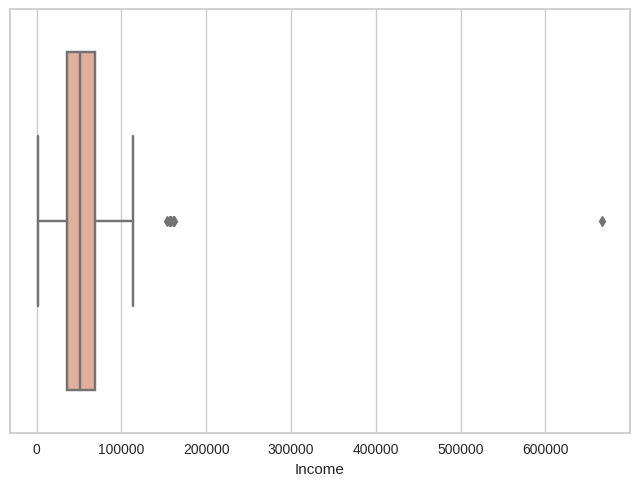

In [ ]:
#Let's look for Outliers [Extreme Values] from Boxplots of the Quantitative Variables
sns.boxplot(x = data3['Income'], color= '#eea990')
plt.show()

We can see that there are some outliers in the "Income" Variable.

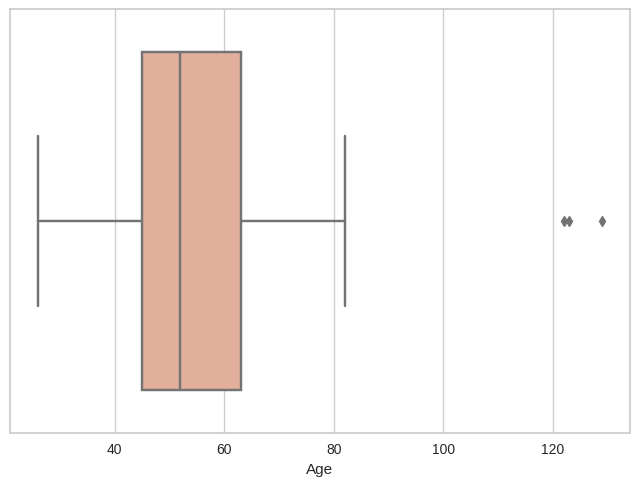

In [ ]:
sns.boxplot(x = data3['Age'], color= '#eea990')
plt.show()

Outlier is present in the "Age" column as well.
Let's remove outliers from "Income" and "Age" Column.

In [20]:
#To remove the outliers, we will be using the IQR Method
# Calculate the upper and lower limits
Q1_I = data3['Income'].quantile(0.25)
Q3_I = data3['Income'].quantile(0.75)
IQR_I = Q3_I - Q1_I
lower_I = Q1_I - 1.5*IQR_I
upper_I = Q3_I + 1.5*IQR_I

print("Income Lower Limit:", lower_I)
print("Income Upper Limit:", upper_I)


Q1_A = data3['Age'].quantile(0.25)
Q3_A = data3['Age'].quantile(0.75)
IQR_A = Q3_A - Q1_A
lower_A = Q1_A - 1.5*IQR_A
upper_A = Q3_A + 1.5*IQR_A

print("Age Lower Limit:", lower_A)
print("Age Upper Limit:", upper_A)

Income Lower Limit: -14525.5
Income Upper Limit: 118350.5
Age Lower Limit: 18.0
Age Upper Limit: 90.0


In [21]:
data3 = data3[(data3["Income"]>=0) & (data3["Income"]<=upper_I)]

data3 = data3[(data3["Age"]>=lower_A) & (data3["Age"]<=upper_A)]

data.shape

(2240, 29)

There were 2216 records in the data3. Now, we have 2240. How?
Let's check out the shape of the data3 first.

In [22]:
data3.reset_index(drop=True,inplace=True)
data3.shape

(2205, 30)

After reseting the index, now it's showing the true number of records. From, 2216 now we have 2205 records. That means, there were 11 records that were outliers or extreme values.

There are better ways to remove outliers, like using-

OR, Capping

Or, Winsorization.

Sometime, you need to take decision based on your experience and judgement as well after having a look at the records and figures.

In [23]:
#Let's look at the new summary of the numerical variables
data3.describe().transpose().round(2)

,count,mean,min,25%,50%,75%,max,std
Income,2205.0,51622.094785,1730.0,35196.0,51287.0,68281.0,113734.0,20713.063826
Kidhome,2205.0,0.442177,0.0,0.0,0.0,1.0,2.0,0.537132
Teenhome,2205.0,0.506576,0.0,0.0,0.0,1.0,2.0,0.54438
Dt_Customer,2205,2013-07-10 06:45:33.061224704,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 00:00:00,2013-12-31 00:00:00,2014-06-29 00:00:00,NaN
Recency,2205.0,49.00907,0.0,24.0,49.0,74.0,99.0,28.932111
MntWines,2205.0,306.164626,0.0,24.0,178.0,507.0,1493.0,337.493839
MntFruits,2205.0,26.403175,0.0,2.0,8.0,33.0,199.0,39.784484
MntMeatProducts,2205.0,165.312018,0.0,16.0,68.0,232.0,1725.0,217.784507
MntFishProducts,2205.0,37.756463,0.0,3.0,12.0,50.0,259.0,54.824635
MntSweetProducts,2205.0,27.128345,0.0,1.0,8.0,34.0,262.0,41.130468


# **Data Preprocessing**

In [35]:
data4 = data3.copy()

In [37]:
data4.drop(["Dt_Customer"], axis = 1, inplace = True)
data4.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Relationship_status,Education_status,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Single,Graduate,65,0,1,1617,22
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Single,Graduate,68,2,3,27,4
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Partner,Graduate,57,0,2,776,20
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Partner,Graduate,38,1,3,53,6
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Partner,Post_Graduate,41,1,3,422,14


We will perform the following transformtions:

1) Log transformation of some of the Skewed Features.

2) Encoding the Categorical data.

3) Standard Scaling (Z-score) all the features.

4) Dimension Reduction (readuce to 3D).

In [38]:
#Finding the Skewed Variables [Skewness between -0.5 to +0.5 is allowed]
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Feature'])

skew_df['Skew'] = skew_df['Feature'].apply(lambda X: scipy.stats.skew(data4[X]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Income,0.013155,0.013155,False
1,Kidhome,0.635063,0.635063,True
2,Teenhome,0.404348,0.404348,False
3,Recency,-0.001873,0.001873,False
4,MntWines,1.166123,1.166123,True
5,MntFruits,2.097852,2.097852,True
6,MntMeatProducts,1.817678,1.817678,True
7,MntFishProducts,1.910727,1.910727,True
8,MntSweetProducts,2.096927,2.096927,True
9,MntGoldProds,1.833219,1.833219,True


We can observe that most of our variables are skewed.

We will perform log transformation to the data to remove the effect of skewness.

In [39]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data4[column] = np.log1p(data4[column])

data4.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Relationship_status,Education_status,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases
0,58138.0,0.000000,0,58,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1.386294,2.197225,2.397895,1.609438,7,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,Single,Graduate,65,0,1,7.388946,22
1,46344.0,0.693147,1,38,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,0.693147,0.693147,1.098612,5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Single,Graduate,68,2,3,3.332205,4
2,71613.0,0.000000,0,26,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,2.197225,1.098612,2.397895,4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Partner,Graduate,57,0,2,6.655440,20
3,26646.0,0.693147,0,26,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,1.098612,0.000000,1.609438,6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Partner,Graduate,38,1,3,3.988984,6
4,58293.0,0.693147,0,94,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,1.791759,1.386294,1.945910,5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Partner,Post_Graduate,41,1,3,6.047372,14


Now, since most of our features are transformed, we will perform Encoding to the Categorical Features.

In [40]:
data5 = data4.copy()

In [41]:
#The get_dummies() function will create dummy variables of categorical variables

data5 = pd.get_dummies(data5,drop_first=True).astype(int)
data5.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Relationship_status_Single,Education_status_Post_Graduate,Education_status_Undergraduate
0,58138,0,0,58,6,4,6,5,4,4,1,2,2,1,7,0,0,0,0,0,0,0,65,0,1,7,22,1,0,0
1,46344,0,1,38,2,0,1,1,0,1,1,0,0,1,5,0,0,0,0,0,0,0,68,2,3,3,4,1,0,0
2,71613,0,0,26,6,3,4,4,3,3,0,2,1,2,4,0,0,0,0,0,0,0,57,0,2,6,20,0,0,0
3,26646,0,0,26,2,1,3,2,1,1,1,1,0,1,6,0,0,0,0,0,0,0,38,1,3,3,6,0,0,0
4,58293,0,0,94,5,3,4,3,3,2,1,1,1,1,5,0,0,0,0,0,0,0,41,1,3,6,14,0,1,0


In [43]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Income                          2205 non-null   int64
 1   Kidhome                         2205 non-null   int64
 2   Teenhome                        2205 non-null   int64
 3   Recency                         2205 non-null   int64
 4   MntWines                        2205 non-null   int64
 5   MntFruits                       2205 non-null   int64
 6   MntMeatProducts                 2205 non-null   int64
 7   MntFishProducts                 2205 non-null   int64
 8   MntSweetProducts                2205 non-null   int64
 9   MntGoldProds                    2205 non-null   int64
 10  NumDealsPurchases               2205 non-null   int64
 11  NumWebPurchases                 2205 non-null   int64
 12  NumCatalogPurchases             2205 non-null   int64
 13  Num

<Axes: >

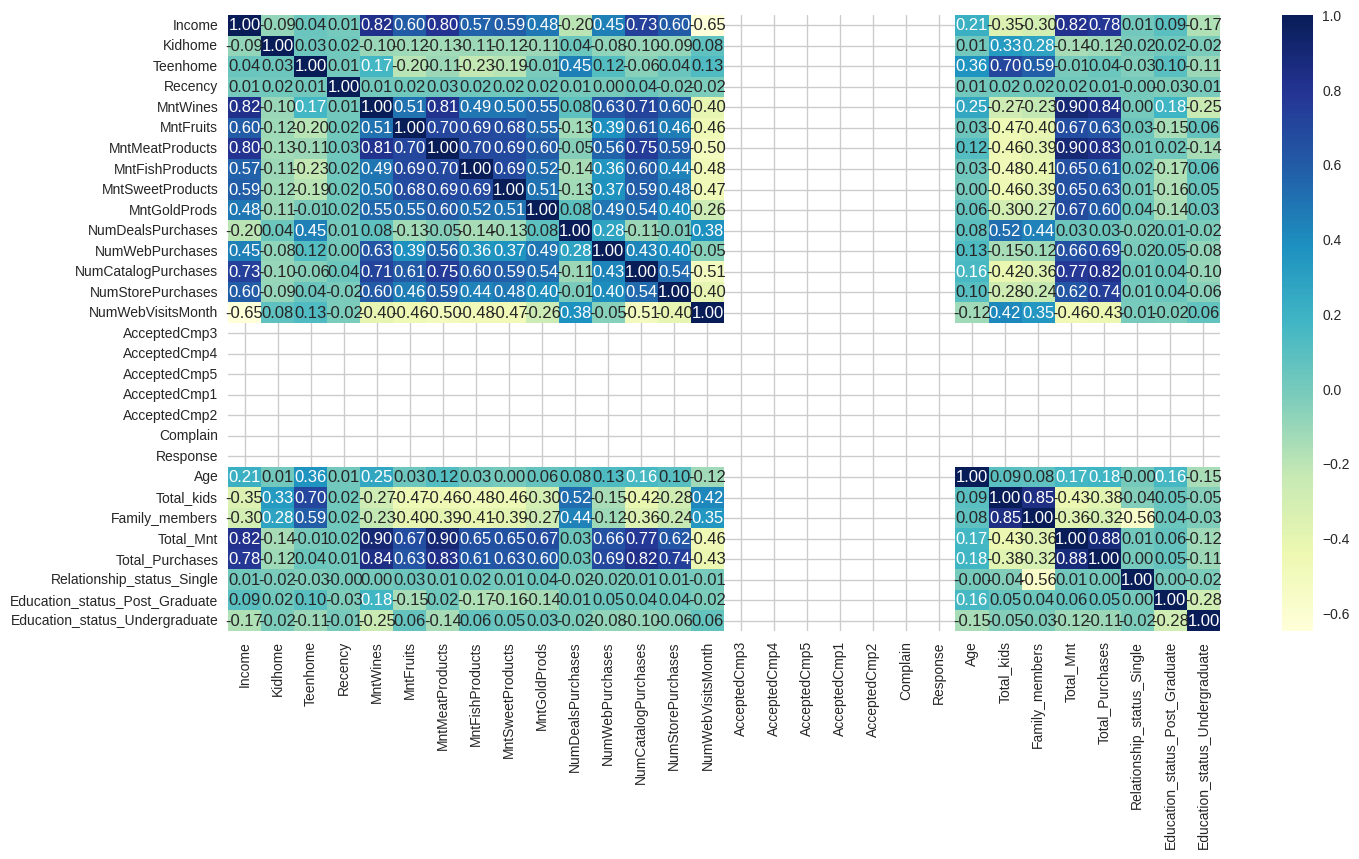

In [44]:
plt.figure(figsize= (16, 8))
sns.heatmap(data5.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

Let's do Feature Scaling of the Numerical Features:

Z = X-mean(X) / SD(X)

In [45]:
data6 = data5.copy()

scaler = StandardScaler()
scaler.fit(data6)

data6 = pd.DataFrame(scaler.transform(data6), columns=data6.columns)

data6.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Relationship_status_Single,Education_status_Post_Graduate,Education_status_Undergraduate
0,0.314651,-0.145966,-0.930767,0.310830,0.999673,1.472468,1.509300,1.841025,1.446634,1.059969,0.736141,1.615603,2.030775,-0.715672,0.689203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.017189,-1.266589,-1.759012,1.232526,1.313658,1.347625,-0.784465,-0.359211
1,-0.254877,-0.145966,0.906602,-0.380600,-1.202954,-1.250209,-1.670527,-0.752465,-1.237841,-1.269498,0.736141,-1.669233,-0.932732,-0.715672,-0.139645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.273530,1.403420,0.448513,-1.418908,-1.193752,1.347625,-0.784465,-0.359211
2,0.965354,-0.145966,-0.930767,-0.795458,0.999673,0.791799,0.237369,1.192653,0.775515,0.283480,-1.039779,1.615603,0.549022,1.328444,-0.554069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333612,-1.266589,-0.655250,0.569668,1.035057,-0.742046,-0.784465,-0.359211
3,-1.206087,-0.145966,-0.930767,-0.795458,-1.202954,-0.569540,-0.398596,-0.104092,-0.566722,-1.269498,0.736141,-0.026815,-0.932732,-0.715672,0.274779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.289883,0.068415,0.448513,-1.418908,-0.915151,-0.742046,-0.784465,-0.359211
4,0.322136,-0.145966,-0.930767,1.555404,0.449016,0.791799,0.237369,0.544280,0.775515,-0.493009,0.736141,-0.026815,0.549022,-0.715672,-0.139645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.033542,0.068415,0.448513,0.569668,0.199254,-0.742046,1.274755,-0.359211


# **Principle Component Analysis (PCA):**

Now, that we have so many features, we cannot visualize those together after clustering as we can only show at most 3 variables together in a plot (3D) plot.

In these cases, Dimensionality Reduction techniques like **PCA (Principle Component Analysis)** are applied. Apply PCA we will reduce dimensions to 3.

Principle Components are build in an combination of the original variables. Principal Components represent the directions of the data that explain a maximal amount of variance, that is to say, capture most information of the data.

After reduction we will plot it.

In [ ]:
pca = PCA(n_components=3)
pca.fit(data6)

data7 = pd.DataFrame(pca.transform(data6), columns=(["PC1","PC2", "PC3"]))
data7.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2205.0,2.932399e-16,3.183590,-7.100336,-2.928732,-0.026223,2.971864,8.165195
PC2,2205.0,5.155866e-17,1.799023,-4.929691,-1.311068,-0.155389,1.369688,5.897102
PC3,2205.0,-5.236426e-17,1.492655,-2.669930,-1.303923,-0.024863,0.948159,5.028254


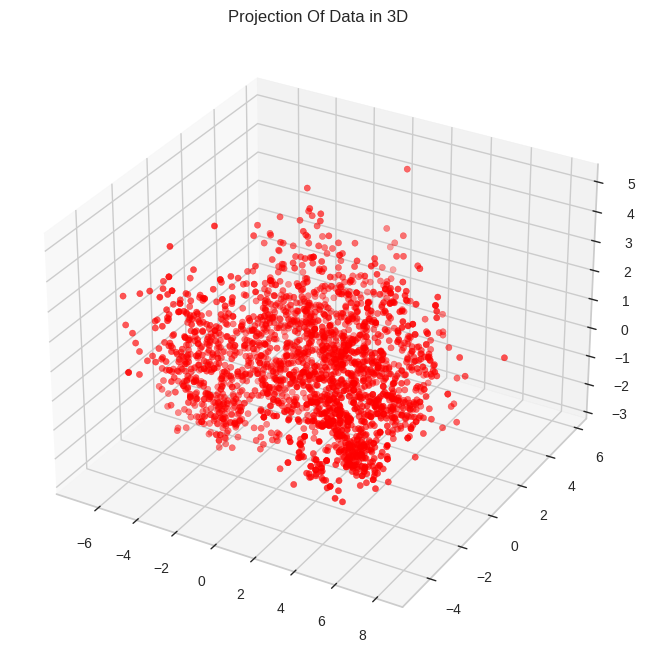

In [ ]:
#Let's plot this together in a 3D plot to better undertstand the relationship among those

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data7["PC1"],data7["PC2"],data7["PC3"], c="red", marker="o")
ax.set_title("Projection Of Data in 3D")
plt.show()

# **Clustering:**

Let us perform Agglomerative (Hierarchical) Clustering. The steps are:-

1) Finding right number of cluster through elbow method.

2) Fitting Agglomerative Clustering model.

3) Examining the clusters.

*** For large dataset, perform KMeans Clustering. Hierarchical Clustering takes more time to run.

In [ ]:
data8 = data7.copy()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

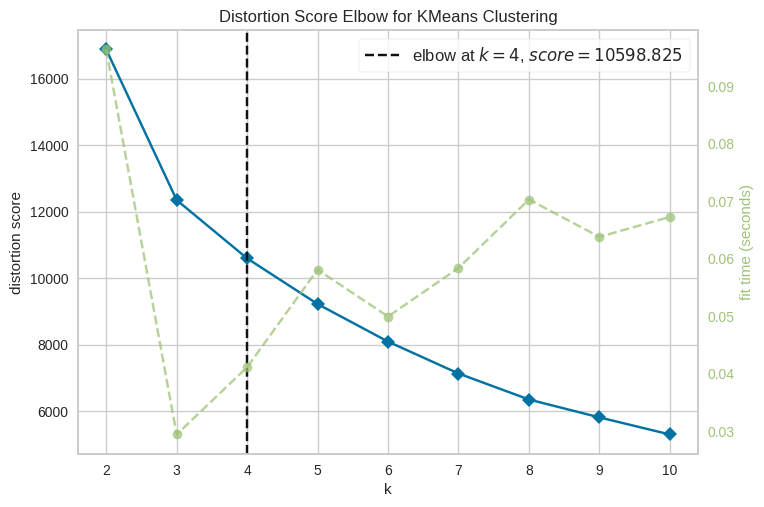

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method to find the Optimum Number of Clusters

Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(data8)
Elbow.show()

So, k = 4
That means, we are suggested to choose 4 clusters.

In [ ]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(data8)

yhat_AC

array([2, 0, 2, ..., 2, 1, 0])

In [ ]:
#Let's check what are the cluster levels
np.unique(yhat_AC)

array([0, 1, 2, 3])

In [ ]:
# Assign the clusters levels to the dataset

data8["Clusters"] = yhat_AC
data8.head()

,PC1,PC2,PC3,Clusters
0,-4.265610,-1.373444,1.054953,2
1,3.859637,-0.302984,1.258519,0
2,-3.120664,-0.424676,-1.803685,2
3,3.080622,-0.898926,-1.849075,0
4,-0.750283,1.097881,-0.786933,3


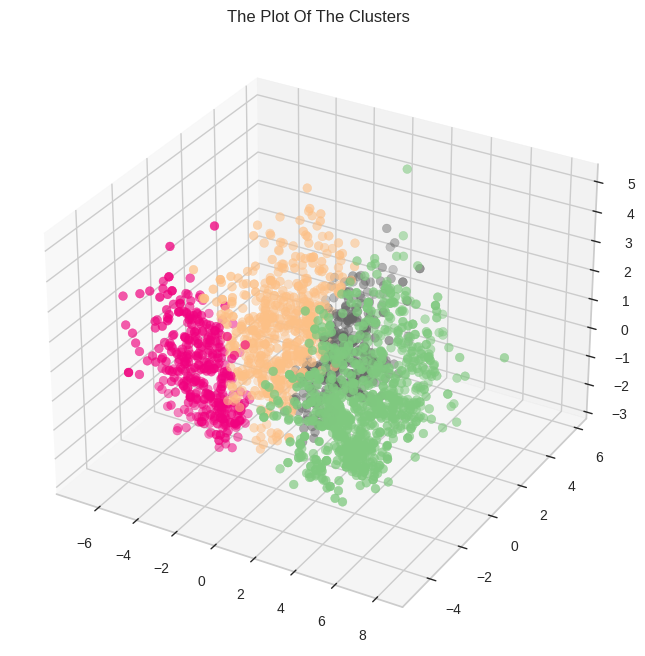

In [ ]:
#Let's plot the Principle Components on a 3D plot with cluster levels

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(data8["PC1"],data8["PC2"],data8["PC3"], s=40, c=data8["Clusters"], marker='o', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
#Let's give names to the cluster levels

data8=data8.replace({0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4'})
data8.head()

,PC1,PC2,PC3,Clusters
0,-4.265610,-1.373444,1.054953,Cluster 3
1,3.859637,-0.302984,1.258519,Cluster 1
2,-3.120664,-0.424676,-1.803685,Cluster 3
3,3.080622,-0.898926,-1.849075,Cluster 1
4,-0.750283,1.097881,-0.786933,Cluster 4


In [ ]:
data8.tail()

,PC1,PC2,PC3,Clusters
2200,-2.574725,1.505464,-1.672018,Cluster 2
2201,1.728929,5.033241,1.404615,Cluster 4
2202,-2.919779,-2.059094,0.894276,Cluster 3
2203,-2.929133,2.094301,-0.112103,Cluster 2
2204,1.955850,2.490729,1.094730,Cluster 1


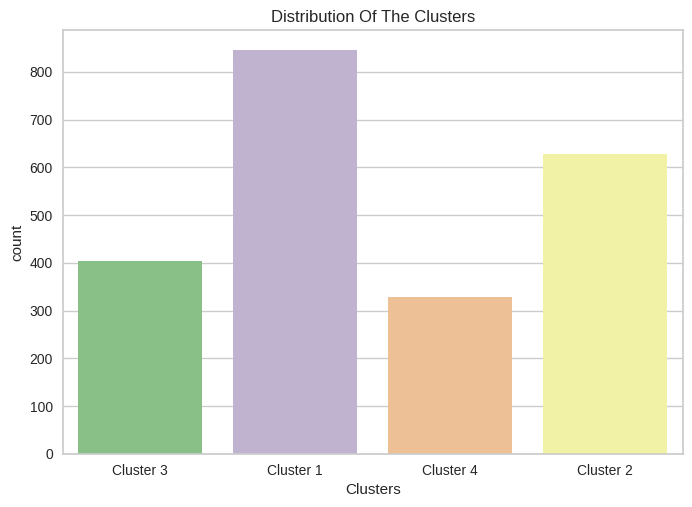

In [ ]:
#Visualizing the Cluster Size

fig = sns.countplot(x=data8["Clusters"], palette= "Accent")
fig.set_title("Distribution Of The Clusters")
plt.show()

# **Cluster Profiling**

"data3" is the cleaned one. We need to assign the cluster levels from "data8" to the "data3" and make summary statistics of different variables for different clusters.

This is called ***Cluster Profiling***.

In [ ]:
data3.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Relationship_status,Education_status,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases
0,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Single,Graduate,65,0,1,1617,22
1,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Single,Graduate,68,2,3,27,4
2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Partner,Graduate,57,0,2,776,20
3,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Partner,Graduate,38,1,3,53,6
4,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Partner,Post_Graduate,41,1,3,422,14


In [ ]:
pd.options.display.float_format = "{:.0f}".format

data_f = data3.merge(data8.Clusters, left_index=True, right_index=True)
data_f.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Relationship_status,Education_status,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Clusters
0,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Single,Graduate,65,0,1,1617,22,Cluster 3
1,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Single,Graduate,68,2,3,27,4,Cluster 1
2,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Partner,Graduate,57,0,2,776,20,Cluster 3
3,26646,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Partner,Graduate,38,1,3,53,6,Cluster 1
4,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Partner,Post_Graduate,41,1,3,422,14,Cluster 4


In [ ]:
data_f["Clusters"].unique()

array(['Cluster 3', 'Cluster 1', 'Cluster 4', 'Cluster 2'], dtype=object)

In [ ]:
data_f.shape

(2205, 31)

In [ ]:
summary= data_f[['Clusters', 'Income','Recency','Age','Family_members','Total_Mnt','Total_Purchases']]

summary.set_index("Clusters", inplace = True)
summary.head()

,Income,Recency,Age,Family_members,Total_Mnt,Total_Purchases
Clusters,,,,,,
Cluster 3,58138.0,58,65,1,1617,22
Cluster 1,46344.0,38,68,3,27,4
Cluster 3,71613.0,26,57,2,776,20
Cluster 1,26646.0,26,38,3,53,6
Cluster 4,58293.0,94,41,3,422,14


In [ ]:
summary=summary.groupby('Clusters').describe().transpose()

pd.options.display.float_format = "{:.1f}".format
summary

Clusters               Cluster 1  Cluster 2  Cluster 3  Cluster 4
Income          count      845.0      628.0      403.0      329.0
                mean     32056.6    61551.4    77354.2    51400.7
                std      11313.7    12975.6    10018.8    10958.5
                min       1730.0     7144.0    41003.0     4428.0
                25%      23830.0    53977.0    71477.0    44010.0
                50%      32173.0    62853.0    78497.0    51369.0
                75%      39684.0    70137.0    83204.0    58597.0
                max      64587.0   113734.0   105471.0    93404.0
Recency         count      845.0      628.0      403.0      329.0
                mean        48.7       48.6       49.5       50.0
                std         28.9       28.8       29.5       28.8
                min          0.0        0.0        0.0        0.0
                25%         24.0       24.0       23.0       26.0
                50%         49.0       49.5       52.0       51.0
                75%         75.0       72.0       74.0       74.0
                max         99.0       99.0       99.0       98.0
Age             count      845.0      628.0      403.0      329.0
                mean        49.9       56.7       52.6       55.0
                std         10.9       10.8       13.9       10.1
                min         26.0       30.0       27.0       33.0
                25%         42.0       48.0       40.0       47.0
                50%         49.0       57.0       52.0       53.0
                75%         57.0       66.0       64.0       64.0
                max         82.0       79.0       81.0       76.0
Family_members  count      845.0      628.0      403.0      329.0
                mean         2.9        2.4        1.6        3.4
                std          0.9        0.6        0.5        0.5
                min          1.0        1.0        1.0        3.0
                25%          2.0        2.0        1.0        3.0
                50%          3.0        2.0        2.0        3.0
                75%          3.0        3.0        2.0        4.0
                max          5.0        4.0        3.0        5.0
Total_Mnt       count      845.0      628.0      403.0      329.0
                mean        70.6      899.8     1425.2      422.3
                std         78.8      436.0      428.6      257.1
                min          5.0      127.0      421.0       63.0
                25%         34.0      534.8     1114.5      240.0
                50%         54.0      886.5     1383.0      393.0
                75%         84.0     1169.5     1722.0      542.0
                max       1730.0     2440.0     2525.0     1616.0
Total_Purchases count      845.0      628.0      403.0      329.0
                mean         5.2       18.0       19.6       12.7
                std          1.9        4.9        4.0        3.9
                min          0.0        7.0       10.0        5.0
                25%          4.0       14.0       17.0       10.0
                50%          5.0       18.0       19.0       13.0
                75%          6.0       22.0       22.0       15.0
                max         28.0       32.0       31.0       25.0

From this, summary statsitics and maybe from few more visualization you can understand the purchasing behavior and demographic information fo different groups (clusters).

# **Classification from Clustering Results:**

At the beginning of our study, we didn't have any Label/Target Variable in our dataset, which we have now (Cluster Levels). From this we can develop classification models and predict in which group which individual/record should fall for new data.

We will choose the dataframe (data6) as it is cleaned, scaled and have gone through all the preprocessing. We will add the cluster levels from the dataframe "data8" and treat this as the target variable.

In [ ]:
pd.options.display.float_format = "{:.4f}".format
data9 = data6.copy()
data9.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Relationship_status_Partner,Relationship_status_Single,Education_status_Graduate,Education_status_Post_Graduate,Education_status_Undergraduate
0,0.3147,-0.8423,-0.9308,0.3108,0.9819,1.4286,1.3984,1.5747,1.4075,1.0598,0.6588,1.2841,1.8140,-0.4166,0.6892,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,2.3710,1.0172,-1.2666,-1.7590,1.2024,1.3137,-1.3476,1.3476,0.9905,-0.7845,-0.3592
1,-0.2549,1.1006,0.9066,-0.3806,-1.2223,-0.9903,-1.4060,-0.8708,-0.9762,-0.9218,0.0400,-1.4229,-0.4105,-1.4858,-0.1396,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,1.2735,1.4034,0.4485,-1.5654,-1.1938,-1.3476,1.3476,0.9905,-0.7845,-0.3592
2,0.9654,-0.8423,-0.9308,-0.7955,0.7607,1.0611,0.4638,1.3125,0.5298,0.4929,-0.8322,1.2841,0.1186,1.2338,-0.5541,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,0.3336,-1.2666,-0.6552,0.7020,1.0351,0.7420,-0.7420,0.9905,-0.7845,-0.3592
3,-1.2061,1.1006,-0.9308,-0.7955,-1.2223,-0.4063,-0.6991,-0.0872,-0.5409,-1.0419,0.0400,-0.6931,-1.3149,-0.4166,0.2748,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,-1.2899,0.0684,0.4485,-1.1173,-0.9152,0.7420,-0.7420,0.9905,-0.7845,-0.3592
4,0.3221,1.1006,-0.9308,1.5554,0.2623,0.9796,0.4169,0.7887,0.6813,-0.2776,1.5309,0.5544,0.4940,0.2877,-0.1396,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,-1.0335,0.0684,0.4485,0.2871,0.1993,0.7420,-0.7420,-1.0096,1.2748,-0.3592


In [ ]:
data9["Clusters"] = data8.loc[:,"Clusters"]
data9.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Relationship_status_Partner,Relationship_status_Single,Education_status_Graduate,Education_status_Post_Graduate,Education_status_Undergraduate,Clusters
0,0.3147,-0.8423,-0.9308,0.3108,0.9819,1.4286,1.3984,1.5747,1.4075,1.0598,0.6588,1.2841,1.8140,-0.4166,0.6892,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,2.3710,1.0172,-1.2666,-1.7590,1.2024,1.3137,-1.3476,1.3476,0.9905,-0.7845,-0.3592,Cluster 3
1,-0.2549,1.1006,0.9066,-0.3806,-1.2223,-0.9903,-1.4060,-0.8708,-0.9762,-0.9218,0.0400,-1.4229,-0.4105,-1.4858,-0.1396,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,1.2735,1.4034,0.4485,-1.5654,-1.1938,-1.3476,1.3476,0.9905,-0.7845,-0.3592,Cluster 1
2,0.9654,-0.8423,-0.9308,-0.7955,0.7607,1.0611,0.4638,1.3125,0.5298,0.4929,-0.8322,1.2841,0.1186,1.2338,-0.5541,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,0.3336,-1.2666,-0.6552,0.7020,1.0351,0.7420,-0.7420,0.9905,-0.7845,-0.3592,Cluster 3
3,-1.2061,1.1006,-0.9308,-0.7955,-1.2223,-0.4063,-0.6991,-0.0872,-0.5409,-1.0419,0.0400,-0.6931,-1.3149,-0.4166,0.2748,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,-1.2899,0.0684,0.4485,-1.1173,-0.9152,0.7420,-0.7420,0.9905,-0.7845,-0.3592,Cluster 1
4,0.3221,1.1006,-0.9308,1.5554,0.2623,0.9796,0.4169,0.7887,0.6813,-0.2776,1.5309,0.5544,0.4940,0.2877,-0.1396,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,-1.0335,0.0684,0.4485,0.2871,0.1993,0.7420,-0.7420,-1.0096,1.2748,-0.3592,Cluster 4


In [ ]:
#As the model would be unable to string categories, we convert this back to Numbers
data9["Clusters"]= data9["Clusters"].replace({'Cluster 1':0, 'Cluster 2':1, 'Cluster 3': 2, 'Cluster 4': 3})
data9.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Relationship_status_Partner,Relationship_status_Single,Education_status_Graduate,Education_status_Post_Graduate,Education_status_Undergraduate,Clusters
0,0.3147,-0.8423,-0.9308,0.3108,0.9819,1.4286,1.3984,1.5747,1.4075,1.0598,0.6588,1.2841,1.8140,-0.4166,0.6892,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,2.3710,1.0172,-1.2666,-1.7590,1.2024,1.3137,-1.3476,1.3476,0.9905,-0.7845,-0.3592,2
1,-0.2549,1.1006,0.9066,-0.3806,-1.2223,-0.9903,-1.4060,-0.8708,-0.9762,-0.9218,0.0400,-1.4229,-0.4105,-1.4858,-0.1396,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,1.2735,1.4034,0.4485,-1.5654,-1.1938,-1.3476,1.3476,0.9905,-0.7845,-0.3592,0
2,0.9654,-0.8423,-0.9308,-0.7955,0.7607,1.0611,0.4638,1.3125,0.5298,0.4929,-0.8322,1.2841,0.1186,1.2338,-0.5541,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,0.3336,-1.2666,-0.6552,0.7020,1.0351,0.7420,-0.7420,0.9905,-0.7845,-0.3592,2
3,-1.2061,1.1006,-0.9308,-0.7955,-1.2223,-0.4063,-0.6991,-0.0872,-0.5409,-1.0419,0.0400,-0.6931,-1.3149,-0.4166,0.2748,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,-1.2899,0.0684,0.4485,-1.1173,-0.9152,0.7420,-0.7420,0.9905,-0.7845,-0.3592,0
4,0.3221,1.1006,-0.9308,1.5554,0.2623,0.9796,0.4169,0.7887,0.6813,-0.2776,1.5309,0.5544,0.4940,0.2877,-0.1396,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,-1.0335,0.0684,0.4485,0.2871,0.1993,0.7420,-0.7420,-1.0096,1.2748,-0.3592,3


In [ ]:
data9["Clusters"].unique()

array([2, 0, 3, 1])

In [ ]:
data9.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Relationship_status_Partner,Relationship_status_Single,Education_status_Graduate,Education_status_Post_Graduate,Education_status_Undergraduate,Clusters
2200,0.4636,-0.8423,0.9066,-0.1040,1.0430,0.9796,0.6938,0.7351,1.5900,1.8584,0.0400,1.4737,0.4940,-0.4166,-0.1396,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,0.1627,0.0684,0.4485,1.0748,0.4779,0.7420,-0.7420,0.9905,-0.7845,-0.3592,1
2201,0.5984,2.2371,0.9066,0.2417,0.7341,-1.4320,-0.4485,-1.5334,-1.4115,-0.7260,2.1498,1.2841,0.1186,-0.0349,0.6892,-0.2825,-0.2835,-0.2807,3.8116,-0.1174,-0.0957,-0.4218,1.9571,2.7384,2.6560,0.3217,0.3386,0.7420,-0.7420,-1.0096,1.2748,-0.3592,3
2202,0.2588,-0.8423,-0.9308,1.4517,1.1802,1.0482,0.8064,0.5755,0.1994,0.0702,-0.8322,-0.6931,0.4940,1.7386,0.2748,-0.2825,3.5278,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,-1.0335,-1.2666,-1.7590,1.0220,0.7565,-1.3476,1.3476,0.9905,-0.7845,-0.3592,2
2203,0.8510,-0.8423,0.9066,-1.4177,0.7633,0.7564,0.7975,1.1170,0.7452,0.7780,0.0400,0.8318,1.0231,1.2338,-0.9685,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,1.1026,0.0684,0.4485,0.7584,1.1744,0.7420,-0.7420,-1.0096,1.2748,-0.3592,1
2204,0.0602,1.1006,0.9066,-0.3115,-0.1354,-0.5485,-0.0026,-0.8708,-0.9762,-0.0294,0.6588,-0.1754,-0.4105,-0.4166,0.6892,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,2.3710,1.2735,1.4034,1.5523,-0.3229,-0.6365,0.7420,-0.7420,-1.0096,1.2748,-0.3592,0


In [ ]:
#Spliting the X (Feature), y (Target)
X = data9.drop("Clusters", axis=1)
y = data9["Clusters"]

X.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Relationship_status_Partner,Relationship_status_Single,Education_status_Graduate,Education_status_Post_Graduate,Education_status_Undergraduate
0,0.3147,-0.8423,-0.9308,0.3108,0.9819,1.4286,1.3984,1.5747,1.4075,1.0598,0.6588,1.2841,1.8140,-0.4166,0.6892,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,2.3710,1.0172,-1.2666,-1.7590,1.2024,1.3137,-1.3476,1.3476,0.9905,-0.7845,-0.3592
1,-0.2549,1.1006,0.9066,-0.3806,-1.2223,-0.9903,-1.4060,-0.8708,-0.9762,-0.9218,0.0400,-1.4229,-0.4105,-1.4858,-0.1396,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,1.2735,1.4034,0.4485,-1.5654,-1.1938,-1.3476,1.3476,0.9905,-0.7845,-0.3592
2,0.9654,-0.8423,-0.9308,-0.7955,0.7607,1.0611,0.4638,1.3125,0.5298,0.4929,-0.8322,1.2841,0.1186,1.2338,-0.5541,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,0.3336,-1.2666,-0.6552,0.7020,1.0351,0.7420,-0.7420,0.9905,-0.7845,-0.3592
3,-1.2061,1.1006,-0.9308,-0.7955,-1.2223,-0.4063,-0.6991,-0.0872,-0.5409,-1.0419,0.0400,-0.6931,-1.3149,-0.4166,0.2748,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,-1.2899,0.0684,0.4485,-1.1173,-0.9152,0.7420,-0.7420,0.9905,-0.7845,-0.3592
4,0.3221,1.1006,-0.9308,1.5554,0.2623,0.9796,0.4169,0.7887,0.6813,-0.2776,1.5309,0.5544,0.4940,0.2877,-0.1396,-0.2825,-0.2835,-0.2807,-0.2624,-0.1174,-0.0957,-0.4218,-1.0335,0.0684,0.4485,0.2871,0.1993,0.7420,-0.7420,-1.0096,1.2748,-0.3592


In [ ]:
y.head()

0    2
1    0
2    2
3    0
4    3
Name: Clusters, dtype: int64

In [ ]:
#Splitting the Dataset intto Test-Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Applying the RandomForestClassifier Model/Algorithm
classifier = RandomForestClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([2, 3, 1, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1, 2, 1, 0, 2, 3, 0, 0, 1, 3,
       2, 0, 1, 0, 0, 2, 3, 0, 3, 3, 2, 1, 3, 1, 0, 3, 0, 0, 3, 1, 1, 0,
       2, 2, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 0, 0, 1, 0, 3, 3,
       3, 0, 2, 0, 3, 3, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0,
       0, 2, 3, 0, 2, 1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 2, 0, 0, 3, 0, 0, 2,
       1, 0, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2, 1, 3, 1, 2, 0,
       1, 0, 0, 1, 3, 1, 3, 0, 1, 3, 0, 2, 1, 0, 1, 0, 3, 1, 0, 2, 1, 2,
       1, 0, 0, 3, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 3, 0, 1, 2, 1, 0, 0, 2,
       2, 1, 3, 2, 1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 3, 0, 3, 1, 3, 0, 0, 2, 0, 0, 3, 1, 0, 1, 2, 3, 3, 3, 1,
       0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 2, 3, 1, 1,
       1, 2, 0, 1, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1, 0, 1, 0, 0, 0, 1, 3, 0,
       2, 3, 0, 0, 0, 1, 0, 2, 3, 1, 0, 2, 3, 0, 2,

In [ ]:
# Classification Score (Prediction Accuracy)
classifier.score(X_test, y_test)

0.9510869565217391

In [ ]:
# Looking at the Confusion Matrix and the Accuracy Score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[210   0   0   5]
 [  0 144   6   8]
 [  0   0  97   0]
 [  3   5   0  74]]


0.9510869565217391

In [ ]:
#We can get the same result using the Crosstabulation/Contingency Table
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3
Clusters,,,,
0,210,0,0,5
1,0,144,6,8
2,0,0,97,0
3,3,5,0,74


In [ ]:
# Looking at the original cluster levels and the predicted cluster levels
final = pd.DataFrame()
final["Acctuate"] = y_test
final["Predicted"] = y_pred
final

,Acctuate,Predicted
1747,2,2
200,3,3
333,1,1
2042,1,3
206,1,1
...,...,...
1585,2,2
1729,0,0
2085,1,1
2009,3,3


Now that we have a pretty decent classification model, we can understand which customer would fall under which cluster (groups) by looking at their new records.


One more thing, we should also give proper names to our different clusters by analyzing the summary statistics of different important variables for different clusters.